2. Двумерная оптимизация выбрать один метод (Розенброк, нелдер-мид, Хук-Дживс)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

Функция step_2_3 выполняет шаги 2 и 3 метода Нелдера-Мида. 

Она принимает на вход dots - массив точек, n - размерность пространства, dtype - тип данных для массива, plot - флаг для сохранения точек, array_dots - массив для сохранения всех точек на каждой итерации. Внутри функции точки преобразуются в массив numpy с заданным типом данных. Затем точки сортируются по значению функции f_x в порядке убывания. Если plot равен True, то текущие точки добавляются в array_dots. Затем вычисляется центр тяжести x_n2 путем нахождения среднего значения всех точек, кроме первой.

In [3]:
def step_2_3(dots, n, dtype, plot, array_dots):
    dots = np.array(dots, dtype=dtype) 
    dots = np.sort(dots, order='f_x')[::-1]
    if plot:
        array_dots.append(list(dots['x'].copy()))
    x_n2 = 1 / n * (np.sum(dots[1:]['x'],  axis=0)) # центр тяжести
    return dots, x_n2

Функция nelder_mead_method реализует метод Нелдера-Мида для оптимизации функции. 

Она принимает следующие параметры: a, b, y - коэффициенты метода, E - допустимая погрешность, n - размерность пространства, f - оптимизируемая функция, dots - начальные точки, plot - флаг для визуализации шагов, x0 - начальная точка при отсутствии dots, h - шаг для создания начальных точек.

Внутри функции создается массив array_dots для сохранения всех точек на каждой итерации, а также задается тип данных dtype для массива точек. Если передана начальная точка x0, то создается массив dots размером (n + 1, n) с заполнением значений x0 и диагонали с добавлением h. Если dots не переданы, то случайным образом создается массив точек размером (n + 1, n). Затем точки преобразуются в пары (f_x, x) с помощью функции f(x).

Далее выполняется цикл, пока условие остановки не будет выполнено. В каждой итерации вычисляется точка x_n3 путем отражения точки dots[0]['x'] относительно центра тяжести x_n2 с коэффициентом a. Затем вычисляется значение функции f_xn3 для точки x_n3. Если f_xn3 меньше или равно значению последней точки, выполняется растяжение точки x_n3 с коэффициентом y. Если значение функции после растяжения меньше значения последней точки, то tmp присваивается значение растянутой точки x_n4, иначе tmp присваивается значение точки x_n3. Первая точка dots[0] обновляется с новым значением tmp. Если f_xn3 находится между значениями второй и первой точек, выполняется сжатие точки `dots`

Если f_xn3 больше значения первой точки, выполняется сжатие точки x_n2 относительно первой точки dots[0]['x'] с коэффициентом b. Первая точка dots[0] обновляется с новым значением tmp.

Если f_xn3 находится между значениями последней и второй точек, обновляется первая точка dots[0] с новым значением x_n3.

Если f_xn3 больше значения первой точки, выполняется сжатие точек dots. Все точки обновляются в соответствии с формулой dots = dots[-1]['x'] + 0.5 * (dots['x'] - dots[-1]['x']), а затем преобразуются в пары (f_x, x).

После выполнения одной итерации метода Нелдера-Мида, точки dots и центр тяжести x_n2 обновляются с помощью функции step_2_3.

В конце функции, если установлен флаг plot, возвращается массив всех точек на каждой итерации и последняя точка dots[-1]['x']. В противном случае возвращается только последняя точка dots[-1]['x'].

In [4]:
def nelder_mead_method(a, b, y, E, n, f, dots=None, plot=False, x0=None, h=10):
    array_dots = []
    dtype = [('f_x', float), ('x', np.float64, (n,))]
    if  x0 is not None:
        dots = np.full((n + 1, n), x0)
        np.fill_diagonal(dots, dots.diagonal() + h)
    if dots is None:
        dots = np.random.random((n + 1, n))
    dots = [(f(x), x) for x in dots]
    dots, x_n2 = step_2_3(dots, n, dtype, plot, array_dots)
    while np.sqrt(np.sum((dots['f_x'] - f(x_n2)) ** 2) / (n + 1)) >= E:
        x_n3 = x_n2 + a * (x_n2 - dots[0]['x']) # отражения
        f_xn3 = f(x_n3)
        if f_xn3 <= dots[-1]['f_x']:
            x_n4 = x_n2 + y * (x_n3 - x_n2) # растяжение
            if f(x_n4) < dots[-1]['f_x']:
                tmp = x_n4
            else:
                tmp = x_n3
            dots[0] = np.array((f(tmp), tmp), dtype=dtype) 
        elif dots[1]['f_x'] < f_xn3 <= dots[0]['f_x']:
            tmp = x_n2 + b * (dots[0]['x'] - x_n2) # сжатия
            dots[0] = np.array((f(tmp), tmp), dtype=dtype) 
        elif dots[-1]['f_x'] < f_xn3 <= dots[1]['f_x']:
            dots[0] = np.array((f(x_n3), x_n3), dtype=dtype) 
        elif f_xn3 > dots[0]['f_x']:
            dots = dots[-1]['x'] + 0.5 * (dots['x'] - dots[-1]['x'])
            dots = [(f(x), x) for x in dots ]
        dots, x_n2 = step_2_3(dots, n, dtype, plot, array_dots)
    if plot:
        return array_dots, dots[-1]['x']
    return dots[-1]['x']

Код запуска программы:

0.0791015625 12.5625


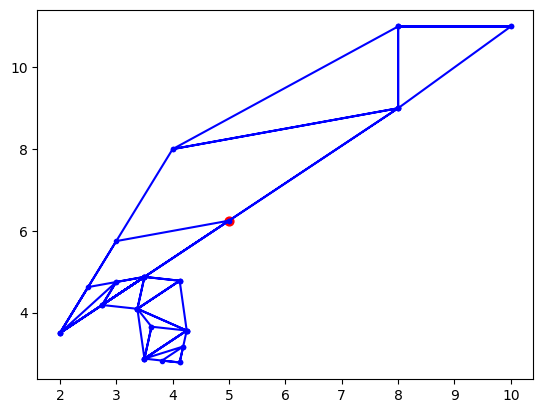

In [21]:
if __name__ == "__main__":
    n = 2
    f = lambda x : 2 * (x[0] - 4) ** 2 + (x[1] - 3) ** 2
    E = 0.2
    a, b, y = 1, 0.5, 2
    dots = np.array([[8,9], [10, 11], [8, 11]], dtype=float)
    ans = nelder_mead_method(a, b, y, E, n, f, dots)
    print(f(ans), f((5, 6.25)))
    array_dots, ans = nelder_mead_method(a, b, y, E, n, f, dots, plot=True)
    X = []
    Y = []

    for dots in array_dots:
        for x, y in dots:
            X.append(x)
            Y.append(y)
        X.append(dots[0][0])
        Y.append(dots[0][1])

    plt.plot(X, Y, marker=".", c="b")
    plt.scatter(5, 6.25, color='red', s=40, marker='o')
    plt.show()